<a href="https://colab.research.google.com/github/AlbertoMontanelli/Machine-Learning/blob/class_unit/class_unit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class: unit
The single unit $i$ is described by the following attributes and methods:


*   Input array -> $x_j$
*   Weight array -> $w_{i,j}$
*   Bias of the unit -> $b_i$
*   Output value -> $f(\sum_{j=0}^nw_{i,j}x_j+b_i)$ where f is the activation function, n the number of inputs



In [ ]:
import numpy as np

# dobbiamo scrivere anche le derivate

def sigmoid(input_array, weight_array, bias):
  return 1 / (1 + np.exp(-(np.dot(input_array, weight_array) + bias)))

def tanh(input_array, weight_array, bias):
  return np.tanh(np.dot(input_array, weight_array) + bias)

def softmax(input_array, weight_array, bias):
  return np.exp(np.dot(input_array, weight_array) + bias) / np.sum(np.exp(np.dot(input_array, weight_array) + bias))

def softplus(input_array, weight_array, bias):
  return np.log(1 + np.exp(np.dot(input_array, weight_array) + bias))

def linear(input_array, weight_array, bias):
  return np.dot(input_array, weight_array) + bias

def ReLU(input_array, weight_array, bias):
  return np.maximum(np.dot(input_array,weight_array) + bias, 0)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2) # in output ho un numero

def mean_squared_error_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size # in output ho un array grande come il numero di nauroni del layer

class Unit:
  def __init__(self, input_array, weight_array, bias, activation_function): #costruttore della classe, qua definisco gli attributi della classe
    self.input_array = input_array
    self.weight_array = weight_array
    self.bias = bias
    self.activation_function = activation_function
    self.output_value = activation_function(input_array, weight_array, bias)

## Test for unit class:


*   Verification of its working by a simple test with a monodimensional array of inputs, weights e bias
*   Verification with multidimensional array and matrix products:
 *  input: $l$ (examples) x $n$ (features) -> we get a weight for each feature (it's indipendent by the number of patterns $l$). Then for the pattern $i$ we get $f(XW+b)=f(\sum_{j=0}^nx_{i,j}w_j+b)$.
 *$k$ units: matrix $X = l$ x $n$, matrix $W$ = $n$ x $k$. Then we get a matrix output $A$ = $l$ x $k$. Each value in the matrix is the output of the activation function for the unit $k$ respect to the example $i$ (many columns as the number of the units, many rows as the number of the examples)



In [2]:
# monodimensional array
x=np.array([1,2,3])
w=np.array([4,5,6])
b=1
neuron = Unit(x, w, b, ReLU)
output=neuron.output_value
print(output)

# multidimensional array
x=np.ones((5,10)) #5 examples, 10 features
w=np.ones((10,6)) #10 features, 6 units
print(x)
print(w)
b=1
neuron = Unit(x, w, b, softplus)
output=neuron.output_value
print(output) #we get 5x6 matrix

33
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]
[[11.0000167 11.0000167 11.0000167 11.0000167 11.0000167 11.0000167]
 [11.0000167 11.0000167 11.0000167 11.0000167 11.0000167 11.0000167]
 [11.0000167 11.0000167 11.0000167 11.0000167 11.0000167 11.0000167]
 [11.0000167 11.0000167 11.0000167 11.0000167 11.0000167 11.0000167]
 [11.0000167 11.0000167 11.0000167 11.0000167 11.0000167 11.0000167]]


## Class: Layer

What we want to do now is implement two more classes: Layer and NeuralNetwork. The first represents a single layer of the neural network, which will consist of multiple neurons (units). The second manages multiple layers (we can decide the number).

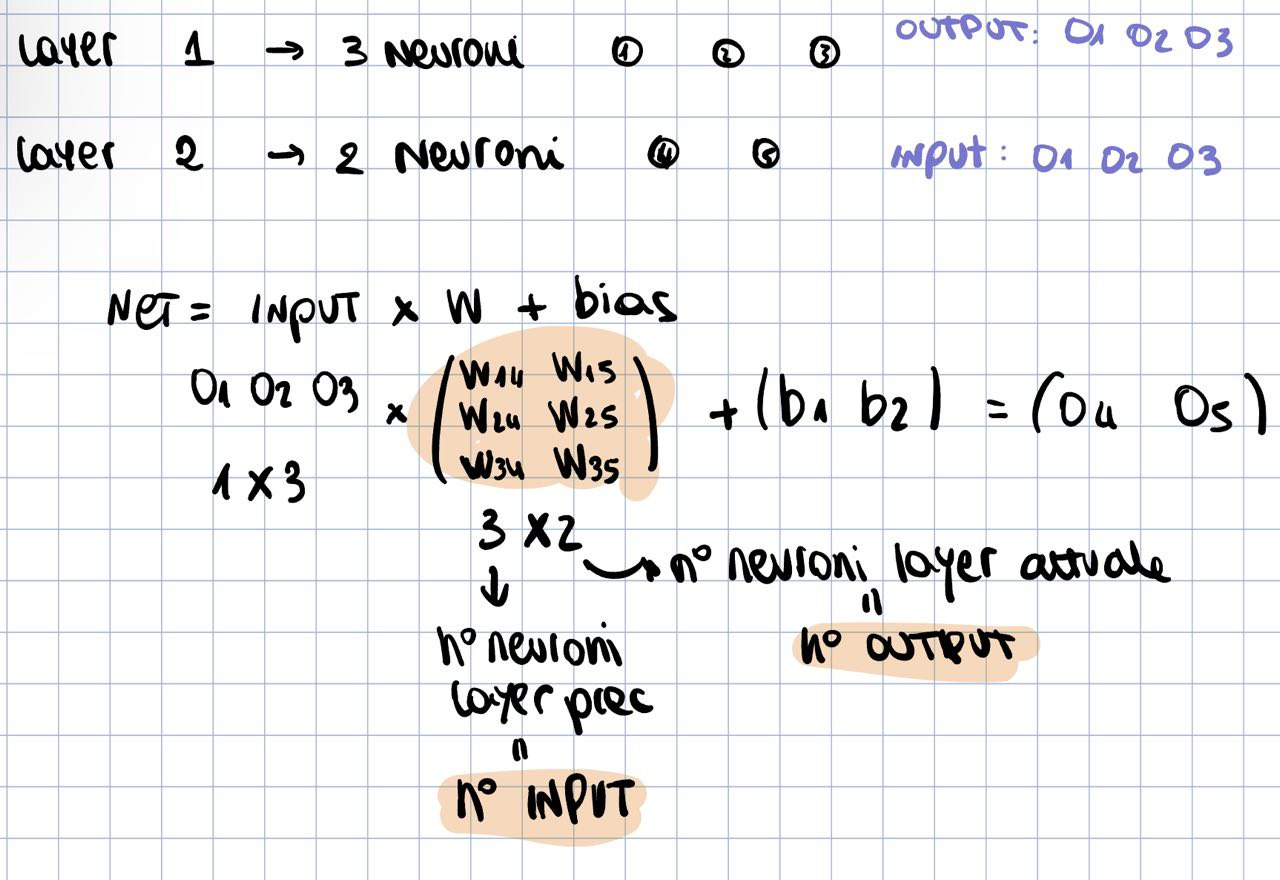

In [ ]:
class Layer:
    def __init__(self, input_size, output_size, activation_function, activation_derivative):
        #input_size: number of previous units
        #output_size: number of actual units
        self.weights = np.random.rand(input_size, output_size)*0.01 # intervallo compreso tra 0 e 1, siccome voglio valori molto vicino allo 0 moltiplico per un numero piccolo
        self.biases = np.zeros(1, output_size) # array 1D perché lo stesso per tutti gli esempi, identifica un neurone. i bias li inizializzo tutti a 0
        self.activation_function = activation_function
        self.activation_derivative = activation_derivative

    # funzione che ci permette di calcolare gli output del layer. PRende come input l'output del layer precedente
    def forward(self, input_array): 
        self.input = input_array # array 1D of previous unit or matrix with number of row = number of examples
        self.net = np.dot(self.input, self.weights) + self.biases # array 1D of actual units or matrix with number of row = number of examples (if number of examples > 1, numpy uses brodcasting)
        self.output = self.activation_function(self.net)
        return self.output
    
    def backward(self, d_Ep, learning_rate): 
        # l serve per normalizzare i gradienti e per far si che la backprop funzioni per batch di diverse dimensioni
        # delta_t: gradiente dell'output calcolato dalla Loss function per loutput layer
        
        l = self.input.shape[0] #number of examples. self.input.shape[1] = number of previous units
        delta_t = d_Ep * self.activation_derivative(self.net)  # examples x actual units. Dopo lo moltiplico per gli input per trovare il peso
        
        self.d_weights = np.dot(self.input.T, delta_t) / l #.T serve per calcolare la trasposta
        self.d_biases = np.sum(delta_t, axis=0, keepdims=True) / l #somma gli elementi di dz lungo le righe (vuol dire sommare gli elementi di ogni colonna, sommo tutti gli esempi di ogni unità) 1 x n of units
        #keepdims = True serve per far si che rimanga una matrice e non un array 1D
        
        self.d_input = np.dot(delta_t, self.weights.T) # passato al layer precedente per continuare la backprop

        #aggiornamento pesi e bias
        self.weights += learning_rate * self.d_weights
        self.biases += learning_rate * self.d_biases

        return self.d_input


## Class: Neural Network 

In [ ]:
class NauralNetwork:
    def __init__(self):
        self.layers = [] # questa riga serve ad inizializzare una lista vuota. tutti i layers che verranno creati verranno aggiunti a questa lista

    def add_layer(self, layer):
        self.layers.append(layer)
    
    # ora dobbiamo fare la backprop per tutti i layer
    def forward(self, input_array): # questo input array sono proprio i dati che abbiamo a disposizione
        for layer in self.layers:
            input_array = layer.forward(input_array) # restituisce l'array di output e lo inserisco in input_array così da usarlo per il layer dopo

        return input_array
    
    def backward(self, d_Ep, learning_rate):
        for layer in reversed(self.layers): # così attraversa la lista in ordine inverso. il gradiente dell'errore propaga all'inverso
            d_Ep = layer.backward(d_Ep, learning_rate)
    
    # funzione di train
    # x_train: dataset, examples x features
    # target: examples x features ? 
    # epochs:  quante volte passo attraverso la rete neurale. Lo scelgo io??
    # learning rate: lo scelgo io? come?
    # loss function and derivative: MSE (da definire sopra)

    def train(self, x_train, target, epochs, learning_rate, loss_function, loss_function_derivative):
        for epoch in range(epochs):
            # Forward propagation
            predictions = self.forward(x_train) # ritorna gli output dell'ultimo layer 

            # Compute loss and loss gradient for backward function
            loss = loss_function(target, predictions)
            loss_gradient = loss_function_derivative(target, predictions)

            # Backward propagation
            self.backward(loss_gradient, learning_rate)

            # Print loss every 10 epochs
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")